In [14]:
### Importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
### Importing the data 

df = pd.read_csv("Motor_Vehicle_Collisions_-_Crashes.csv")


C:\Users\Adarsh\AppData\Local\Temp\ipykernel_20544\4042026931.py:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Motor_Vehicle_Collisions_-_Crashes.csv")


In [16]:
### Checking for null values

df.isnull().sum()

CRASH DATE                             0
CRASH TIME                             0
BOROUGH                           625960
ZIP CODE                          626198
LATITUDE                          229251
LONGITUDE                         229251
LOCATION                          229251
ON STREET NAME                    423023
CROSS STREET NAME                 752326
OFF STREET NAME                  1681521
NUMBER OF PERSONS INJURED             18
NUMBER OF PERSONS KILLED              31
NUMBER OF PEDESTRIANS INJURED          0
NUMBER OF PEDESTRIANS KILLED           0
NUMBER OF CYCLIST INJURED              0
NUMBER OF CYCLIST KILLED               0
NUMBER OF MOTORIST INJURED             0
NUMBER OF MOTORIST KILLED              0
CONTRIBUTING FACTOR VEHICLE 1       6315
CONTRIBUTING FACTOR VEHICLE 2     306583
CONTRIBUTING FACTOR VEHICLE 3    1869626
CONTRIBUTING FACTOR VEHICLE 4    1980202
CONTRIBUTING FACTOR VEHICLE 5    2003546
COLLISION_ID                           0
VEHICLE TYPE COD

In [17]:
df.head(2)

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN


In [18]:
df.count()

CRASH DATE                       2012173
CRASH TIME                       2012173
BOROUGH                          1386213
ZIP CODE                         1385975
LATITUDE                         1782922
LONGITUDE                        1782922
LOCATION                         1782922
ON STREET NAME                   1589150
CROSS STREET NAME                1259847
OFF STREET NAME                   330652
NUMBER OF PERSONS INJURED        2012155
NUMBER OF PERSONS KILLED         2012142
NUMBER OF PEDESTRIANS INJURED    2012173
NUMBER OF PEDESTRIANS KILLED     2012173
NUMBER OF CYCLIST INJURED        2012173
NUMBER OF CYCLIST KILLED         2012173
NUMBER OF MOTORIST INJURED       2012173
NUMBER OF MOTORIST KILLED        2012173
CONTRIBUTING FACTOR VEHICLE 1    2005858
CONTRIBUTING FACTOR VEHICLE 2    1705590
CONTRIBUTING FACTOR VEHICLE 3     142547
CONTRIBUTING FACTOR VEHICLE 4      31971
CONTRIBUTING FACTOR VEHICLE 5       8627
COLLISION_ID                     2012173
VEHICLE TYPE COD

In [19]:
### Checking the most common vehicle involved in accidents in Vehicle type code 1

df["VEHICLE TYPE CODE 1"].value_counts()

Sedan                                  547926
Station Wagon/Sport Utility Vehicle    431578
PASSENGER VEHICLE                      416206
SPORT UTILITY / STATION WAGON          180291
Taxi                                    49858
                                        ...  
TR-Trailer                                  1
ESU RESCUE                                  1
pedicab                                     1
TTRAILER                                    1
a                                           1
Name: VEHICLE TYPE CODE 1, Length: 1554, dtype: int64

In [20]:
### Checking the number of unique vehicles 

df["VEHICLE TYPE CODE 1"].nunique()

1554

In [21]:
### Changing the vehicle type code column name to make it easier later

df.rename(columns={'VEHICLE TYPE CODE 1':'Vehicle1',
                   'VEHICLE TYPE CODE 2':'Vehicle2',
                   'VEHICLE TYPE CODE 3':'Vehicle3',
                   'VEHICLE TYPE CODE 4':'Vehicle4',
                   'VEHICLE TYPE CODE 5':'Vehicle5' },
          inplace = True)

In [22]:
### Checking the unique vehicles in vehicle2 column
df.Vehicle2.unique()

array(['Sedan', nan, 'Pick-up Truck', ..., 'TRAILER/TR', 'POSTOFFICE',
       '12 PASSENG'], dtype=object)

In [23]:
### The below two blocks are to check the most common vehicles in accidents in columns Vehicle3 and vehicle4

In [24]:
df.Vehicle3.value_counts()

Sedan                                  41889
Station Wagon/Sport Utility Vehicle    33971
PASSENGER VEHICLE                      27713
SPORT UTILITY / STATION WAGON          13358
UNKNOWN                                 3284
                                       ...  
BUs                                        1
tank                                       1
USPS POSTA                                 1
POSTA                                      1
Unk                                        1
Name: Vehicle3, Length: 244, dtype: int64

In [25]:
df.Vehicle4.value_counts()

Sedan                                  10113
Station Wagon/Sport Utility Vehicle     8253
PASSENGER VEHICLE                       5969
SPORT UTILITY / STATION WAGON           2852
UNKNOWN                                  595
                                       ...  
TRAIL                                      1
Deliv                                      1
TOW T                                      1
trail                                      1
Stake or Rack                              1
Name: Vehicle4, Length: 99, dtype: int64

In [30]:
### filling in the null value in 'number of persons injured' 

df['NUMBER OF PERSONS INJURED'].fillna('0') 

0          2.0
1          1.0
2          0.0
3          0.0
4          0.0
          ... 
2012168    0.0
2012169    1.0
2012170    1.0
2012171    2.0
2012172    4.0
Name: NUMBER OF PERSONS INJURED, Length: 2012173, dtype: object

In [31]:
df['NUMBER OF PERSONS INJURED'].value_counts()
### the max number of people injured in a single accident is 43

0.0     1564899
1.0      347071
2.0       65376
3.0       21353
4.0        7948
5.0        3085
6.0        1279
7.0         548
8.0         239
9.0         119
10.0         79
11.0         46
12.0         29
13.0         24
15.0         11
14.0          9
16.0          8
18.0          7
17.0          5
19.0          4
22.0          3
24.0          3
20.0          2
40.0          1
31.0          1
27.0          1
32.0          1
43.0          1
21.0          1
23.0          1
34.0          1
Name: NUMBER OF PERSONS INJURED, dtype: int64

In [32]:
df['NUMBER OF PERSONS KILLED'].value_counts()
### max number of people killed in 1 accident is 8 

0.0    2009357
1.0       2697
2.0         71
3.0         12
4.0          3
8.0          1
5.0          1
Name: NUMBER OF PERSONS KILLED, dtype: int64

In [33]:
### Checking the unique values in 'contributing factor vehicle 1' 

df['CONTRIBUTING FACTOR VEHICLE 1'].unique()

array(['Aggressive Driving/Road Rage', 'Pavement Slippery',
       'Following Too Closely', 'Unspecified', nan, 'Passing Too Closely',
       'Driver Inexperience', 'Passing or Lane Usage Improper',
       'Turning Improperly', 'Unsafe Lane Changing', 'Unsafe Speed',
       'Reaction to Uninvolved Vehicle', 'Steering Failure',
       'Traffic Control Disregarded', 'Other Vehicular',
       'Driver Inattention/Distraction', 'Oversized Vehicle',
       'Pedestrian/Bicyclist/Other Pedestrian Error/Confusion',
       'Alcohol Involvement', 'View Obstructed/Limited',
       'Failure to Yield Right-of-Way', 'Illnes', 'Lost Consciousness',
       'Brakes Defective', 'Backing Unsafely', 'Glare',
       'Passenger Distraction', 'Fell Asleep', 'Obstruction/Debris',
       'Tinted Windows', 'Animals Action', 'Drugs (illegal)',
       'Pavement Defective', 'Other Lighting Defects',
       'Outside Car Distraction', 'Driverless/Runaway Vehicle',
       'Tire Failure/Inadequate', 'Fatigued/Drowsy',


In [34]:
### Checking all the contributing factor columns to see the most common reason for accidents

In [35]:
df['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()

Unspecified                       691207
Driver Inattention/Distraction    399797
Failure to Yield Right-of-Way     118777
Following Too Closely             107063
Backing Unsafely                   74861
                                   ...  
Cell Phone (hand-held)                79
Windshield Inadequate                 77
Texting                               50
Listening/Using Headphones            24
1                                     10
Name: CONTRIBUTING FACTOR VEHICLE 1, Length: 61, dtype: int64

In [36]:
df['CONTRIBUTING FACTOR VEHICLE 2'].value_counts()

Unspecified                       1436040
Driver Inattention/Distraction      91425
Other Vehicular                     31273
Following Too Closely               18290
Failure to Yield Right-of-Way       16709
                                   ...   
Eating or Drinking                     10
Listening/Using Headphones             10
Windshield Inadequate                   7
1                                       5
Texting                                 3
Name: CONTRIBUTING FACTOR VEHICLE 2, Length: 61, dtype: int64

In [37]:
df['CONTRIBUTING FACTOR VEHICLE 3'].value_counts()

Unspecified                                              132912
Other Vehicular                                            2650
Driver Inattention/Distraction                             1874
Following Too Closely                                      1849
Fatigued/Drowsy                                             853
Pavement Slippery                                           380
Reaction to Uninvolved Vehicle                              200
Driver Inexperience                                         174
Outside Car Distraction                                     160
Traffic Control Disregarded                                 153
Unsafe Speed                                                146
Failure to Yield Right-of-Way                               143
Passing or Lane Usage Improper                              103
Alcohol Involvement                                         101
Backing Unsafely                                             93
Turning Improperly                      

In [38]:
df.Vehicle3.value_counts()

Sedan                                  41889
Station Wagon/Sport Utility Vehicle    33971
PASSENGER VEHICLE                      27713
SPORT UTILITY / STATION WAGON          13358
UNKNOWN                                 3284
                                       ...  
BUs                                        1
tank                                       1
USPS POSTA                                 1
POSTA                                      1
Unk                                        1
Name: Vehicle3, Length: 244, dtype: int64

In [39]:
filtr = df == 'Sedan'
df[filtr].count().agg(sum)
### getting the total number of 'sedan' involved in accidents

989928

In [40]:
filtr = df == 'PASSENGER VEHICLE'
df[filtr].count().agg(sum)
### getting the total number of 'passenger vehicle' involved in accidents

769982

In [41]:
filtr = df == 'Station Wagon/Sport Utility Vehicle'
df[filtr].count().agg(sum)
### getting the total number of 'Station Wagon/Sport Utility Vehicle' involved in accidents

790149

In [42]:
filtr = df == 'SPORT UTILITY / STATION WAGON'
df[filtr].count().agg(sum)
### the total number of suv and station wagon involved in accidents is (337507+790149)1127656 adding the values of

337507

In [43]:
### with the above data we tell that the most vehicle type involved in accidents is 
### 1)suvs/station wagons with 1127656 (assuming that 'SPORT UTILITY/STATION WAGON' and 'Station Wagon/Sport Utility Vechile' are the same type of vehicle)
### 2)sedan with 989928
### 3)passenger vehicle with 769982


In [44]:
df[['CONTRIBUTING FACTOR VEHICLE 1','CONTRIBUTING FACTOR VEHICLE 2','CONTRIBUTING FACTOR VEHICLE 3','CONTRIBUTING FACTOR VEHICLE 4','CONTRIBUTING FACTOR VEHICLE 5']].apply(pd.Series.value_counts)

,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5
1,10,5,1.0,NaN,NaN
80,101,22,3.0,NaN,NaN
Accelerator Defective,1054,72,4.0,1.0,NaN
Aggressive Driving/Road Rage,9197,1602,43.0,6.0,1.0
Alcohol Involvement,21559,1521,101.0,19.0,10.0
...,...,...,...,...,...
Unspecified,691207,1436040,132912.0,30175.0,8135.0
Using On Board Navigation Device,146,13,NaN,NaN,NaN
Vehicle Vandalism,131,13,NaN,NaN,NaN
View Obstructed/Limited,13177,3027,44.0,3.0,NaN


In [45]:
for col in df.columns:
    print('-' * 40 + col + '-' * 40 , end=' - ')
    display(df[col].value_counts().head(10))
    ### by looking at the contributing factors we can tell that the top factors are unspecified,driver inattention/distraction,
    ### following too closely, failure to yield right of law,other vehicular
    ### the highest number of accidents occured on a single date is 1161 which was of 21st of june in 2014
    ### the second highest was on 15th november in 2018

----------------------------------------CRASH DATE---------------------------------------- - 

01/21/2014    1161
11/15/2018    1065
12/15/2017     999
05/19/2017     974
01/18/2015     961
02/03/2014     960
03/06/2015     939
05/18/2017     911
01/07/2017     896
03/02/2018     884
Name: CRASH DATE, dtype: int64

----------------------------------------CRASH TIME---------------------------------------- - 

16:00    27882
17:00    27314
15:00    27263
18:00    25248
14:00    24969
13:00    23226
9:00     21032
12:00    20965
19:00    20925
16:30    20095
Name: CRASH TIME, dtype: int64

----------------------------------------BOROUGH---------------------------------------- - 

BROOKLYN         439575
QUEENS           371347
MANHATTAN        312528
BRONX            204630
STATEN ISLAND     58133
Name: BOROUGH, dtype: int64

----------------------------------------ZIP CODE---------------------------------------- - 

11207.0    19703
11236.0    14149
11234.0    12993
11203.0    12949
11385.0    12890
11212.0    12818
11101.0    12732
11208.0    12642
11226.0    12169
11434.0    11894
Name: ZIP CODE, dtype: int64

----------------------------------------LATITUDE---------------------------------------- - 

0.000000     4214
40.861862     848
40.696033     740
40.804700     691
40.608757     671
40.798256     627
40.759308     613
40.696035     587
40.675735     532
40.658577     498
Name: LATITUDE, dtype: int64

----------------------------------------LONGITUDE---------------------------------------- - 

 0.000000     4214
-73.890630     732
-73.912820     717
-73.984530     698
-74.038086     672
-73.912430     652
-73.896860     629
-73.984529     587
-73.882744     560
-73.944760     558
Name: LONGITUDE, dtype: int64

----------------------------------------LOCATION---------------------------------------- - 

(0.0, 0.0)                   4214
(40.861862, -73.91282)        685
(40.608757, -74.038086)       670
(40.696033, -73.98453)        646
(40.8047, -73.91243)          597
(40.6960346, -73.9845292)     587
(40.675735, -73.89686)        531
(40.658577, -73.89063)        486
(40.7606005, -73.9643142)     474
(40.820305, -73.89083)        467
Name: LOCATION, dtype: int64

----------------------------------------ON STREET NAME---------------------------------------- - 

BROADWAY                            17277
ATLANTIC AVENUE                     15322
BELT PARKWAY                        13543
3 AVENUE                            12476
NORTHERN BOULEVARD                  11965
LONG ISLAND EXPRESSWAY               9928
BROOKLYN QUEENS EXPRESSWAY           9743
FLATBUSH AVENUE                      9741
LINDEN BOULEVARD                     9587
QUEENS BOULEVARD                     9368
Name: ON STREET NAME, dtype: int64

----------------------------------------CROSS STREET NAME---------------------------------------- - 

3 AVENUE                            9843
BROADWAY                            9685
2 AVENUE                            8421
5 AVENUE                            7051
7 AVENUE                            6634
8 AVENUE                            6580
3 AVENUE                            6453
BROADWAY                            5997
1 AVENUE                            5318
PARK AVENUE                         4847
Name: CROSS STREET NAME, dtype: int64

----------------------------------------OFF STREET NAME---------------------------------------- - 

772       EDGEWATER ROAD                    402
110-00    ROCKAWAY BOULEVARD                261
2800      VICTORY BOULEVARD                 236
2655      RICHMOND AVENUE                   169
2100      BARTOW AVENUE                     167
501       GATEWAY DRIVE                     164
PARKING LOT 110-00 ROCKAWAY BOULEVARD       150
450       FLATBUSH AVENUE                   145
625       ATLANTIC AVENUE                   145
3 AVENUE                                    142
Name: OFF STREET NAME, dtype: int64

----------------------------------------NUMBER OF PERSONS INJURED---------------------------------------- - 

0.0    1564899
1.0     347071
2.0      65376
3.0      21353
4.0       7948
5.0       3085
6.0       1279
7.0        548
8.0        239
9.0        119
Name: NUMBER OF PERSONS INJURED, dtype: int64

----------------------------------------NUMBER OF PERSONS KILLED---------------------------------------- - 

0.0    2009357
1.0       2697
2.0         71
3.0         12
4.0          3
8.0          1
5.0          1
Name: NUMBER OF PERSONS KILLED, dtype: int64

----------------------------------------NUMBER OF PEDESTRIANS INJURED---------------------------------------- - 

0     1905841
1      102439
2        3447
3         344
4          56
5          25
6          11
7           3
9           2
27          1
Name: NUMBER OF PEDESTRIANS INJURED, dtype: int64

----------------------------------------NUMBER OF PEDESTRIANS KILLED---------------------------------------- - 

0    2010732
1       1428
2         12
6          1
Name: NUMBER OF PEDESTRIANS KILLED, dtype: int64

----------------------------------------NUMBER OF CYCLIST INJURED---------------------------------------- - 

0    1960431
1      51173
2        547
3         21
4          1
Name: NUMBER OF CYCLIST INJURED, dtype: int64

----------------------------------------NUMBER OF CYCLIST KILLED---------------------------------------- - 

0    2011950
1        222
2          1
Name: NUMBER OF CYCLIST KILLED, dtype: int64

----------------------------------------NUMBER OF MOTORIST INJURED---------------------------------------- - 

0    1726106
1     192429
2      59755
3      20724
4       7792
5       3035
6       1234
7        524
8        230
9        115
Name: NUMBER OF MOTORIST INJURED, dtype: int64

----------------------------------------NUMBER OF MOTORIST KILLED---------------------------------------- - 

0    2011082
1       1021
2         55
3         12
4          2
5          1
Name: NUMBER OF MOTORIST KILLED, dtype: int64

----------------------------------------CONTRIBUTING FACTOR VEHICLE 1---------------------------------------- - 

Unspecified                       691207
Driver Inattention/Distraction    399797
Failure to Yield Right-of-Way     118777
Following Too Closely             107063
Backing Unsafely                   74861
Other Vehicular                    62514
Passing or Lane Usage Improper     55177
Turning Improperly                 49778
Passing Too Closely                49645
Fatigued/Drowsy                    47337
Name: CONTRIBUTING FACTOR VEHICLE 1, dtype: int64

----------------------------------------CONTRIBUTING FACTOR VEHICLE 2---------------------------------------- - 

Unspecified                       1436040
Driver Inattention/Distraction      91425
Other Vehicular                     31273
Following Too Closely               18290
Failure to Yield Right-of-Way       16709
Passing or Lane Usage Improper      12392
Fatigued/Drowsy                     10834
Turning Improperly                   8598
Passing Too Closely                  8463
Backing Unsafely                     7789
Name: CONTRIBUTING FACTOR VEHICLE 2, dtype: int64

----------------------------------------CONTRIBUTING FACTOR VEHICLE 3---------------------------------------- - 

Unspecified                       132912
Other Vehicular                     2650
Driver Inattention/Distraction      1874
Following Too Closely               1849
Fatigued/Drowsy                      853
Pavement Slippery                    380
Reaction to Uninvolved Vehicle       200
Driver Inexperience                  174
Outside Car Distraction              160
Traffic Control Disregarded          153
Name: CONTRIBUTING FACTOR VEHICLE 3, dtype: int64

----------------------------------------CONTRIBUTING FACTOR VEHICLE 4---------------------------------------- - 

Unspecified                       30175
Other Vehicular                     572
Following Too Closely               366
Driver Inattention/Distraction      266
Fatigued/Drowsy                     170
Pavement Slippery                   110
Reaction to Uninvolved Vehicle       39
Driver Inexperience                  27
Outside Car Distraction              27
Unsafe Speed                         27
Name: CONTRIBUTING FACTOR VEHICLE 4, dtype: int64

----------------------------------------CONTRIBUTING FACTOR VEHICLE 5---------------------------------------- - 

Unspecified                       8135
Other Vehicular                    165
Following Too Closely               89
Driver Inattention/Distraction      63
Pavement Slippery                   47
Fatigued/Drowsy                     41
Reaction to Uninvolved Vehicle      12
Alcohol Involvement                 10
Driver Inexperience                 10
Unsafe Speed                         9
Name: CONTRIBUTING FACTOR VEHICLE 5, dtype: int64

----------------------------------------COLLISION_ID---------------------------------------- - 

4455765    1
3216331    1
3214450    1
3213446    1
3218129    1
3222426    1
3214756    1
3214192    1
3222390    1
3218985    1
Name: COLLISION_ID, dtype: int64

----------------------------------------Vehicle1---------------------------------------- - 

Sedan                                  547926
Station Wagon/Sport Utility Vehicle    431578
PASSENGER VEHICLE                      416206
SPORT UTILITY / STATION WAGON          180291
Taxi                                    49858
4 dr sedan                              40158
Pick-up Truck                           33214
TAXI                                    31911
VAN                                     25266
Box Truck                               23326
Name: Vehicle1, dtype: int64

----------------------------------------Vehicle2---------------------------------------- - 

Sedan                                  387169
PASSENGER VEHICLE                      318607
Station Wagon/Sport Utility Vehicle    313998
SPORT UTILITY / STATION WAGON          140204
UNKNOWN                                 81498
Taxi                                    36584
Pick-up Truck                           30230
4 dr sedan                              30073
Bike                                    29345
TAXI                                    27702
Name: Vehicle2, dtype: int64

----------------------------------------Vehicle3---------------------------------------- - 

Sedan                                  41889
Station Wagon/Sport Utility Vehicle    33971
PASSENGER VEHICLE                      27713
SPORT UTILITY / STATION WAGON          13358
UNKNOWN                                 3284
4 dr sedan                              2563
Pick-up Truck                           2139
Taxi                                    2132
VAN                                     1366
OTHER                                   1045
Name: Vehicle3, dtype: int64

----------------------------------------Vehicle4---------------------------------------- - 

Sedan                                  10113
Station Wagon/Sport Utility Vehicle     8253
PASSENGER VEHICLE                       5969
SPORT UTILITY / STATION WAGON           2852
UNKNOWN                                  595
4 dr sedan                               567
Pick-up Truck                            454
Taxi                                     422
VAN                                      242
OTHER                                    189
Name: Vehicle4, dtype: int64

----------------------------------------Vehicle5---------------------------------------- - 

Sedan                                  2831
Station Wagon/Sport Utility Vehicle    2349
PASSENGER VEHICLE                      1487
SPORT UTILITY / STATION WAGON           802
Pick-up Truck                           143
4 dr sedan                              123
Taxi                                    102
UNKNOWN                                  94
VAN                                      50
OTHER                                    49
Name: Vehicle5, dtype: int64

In [46]:
filtr = df == 'Unspecified'
df[filtr].count().agg(sum)

2298469

In [47]:
filtr = df == 'Driver Inattention/Distraction'
df[filtr].count().agg(sum)

493425

In [48]:
filtr = df == 'Other Vehicular'
df[filtr].count().agg(sum)

97174

In [49]:
filtr = df == 'Following Too Closely'
df[filtr].count().agg(sum)

127657

In [50]:
filtr = df == 'Failure to Yield Right-of-Way'
df[filtr].count().agg(sum)

135650

In [51]:
### from the above info we can tell that the top 5 factors contributing to accidents are
### 1)Unspecified with (2298469)
### 2)Driver Inattention/Distraction with (493425)
### 3)Failure to Yield Right-of-Way with (135650) 
### 4)Following Too Closely with (127657)
### 5)Other Vehicular with (97174)


In [52]:
### now i'll work with the time columns to see what time the most accidents occured 
### and further see at what time most deaths occured

In [53]:
df.rename(columns={'CRASH DATE':'CRASHDATE','CRASH TIME':'CRASHTIME'},inplace=True)

In [54]:
df['CRASHDATE'] = pd.to_datetime(df['CRASHDATE'])


In [55]:
df['CRASHTIME'] = pd.to_datetime(df['CRASHTIME'], format='%H:%M').dt.time

In [56]:
df.CRASHTIME

0          02:39:00
1          11:45:00
2          06:55:00
3          09:35:00
4          08:13:00
             ...   
2012168    14:57:00
2012169    20:48:00
2012170    18:24:00
2012171    22:54:00
2012172    08:15:00
Name: CRASHTIME, Length: 2012173, dtype: object

In [57]:
df.CRASHTIME.value_counts()

16:00:00    27882
17:00:00    27314
15:00:00    27263
18:00:00    25248
14:00:00    24969
            ...  
05:31:00       93
04:02:00       91
02:31:00       90
04:31:00       88
03:31:00       87
Name: CRASHTIME, Length: 1440, dtype: int64

In [58]:
### FROM THE ABOVE WE CAN TELL THAT THE MOST NUMBER OF ACCIDENTS OCCUR AT THE FOLLOWING TIMES
### 1)16:00:00 WHICH HAD 27882 ACCIDENTS 
### 2)17:00:00 WHICH HAD 27314 ACCIDENTS
### 3)15:00:00 WHICH HAD 27263 ACCIDENTS
### 4)18:00:00 WHICH HAD 25248 ACCIDENTS
### 5)14:00:00 WHICH HAD 24969 ACCIDENTS
### majority of the accidents happen between 14:00:00 to 16:00:00

In [59]:
filt = df['CRASHDATE'] == '2019' 

In [61]:
df['DAYOFWEEK'] = df['CRASHDATE'].dt.day_name()

In [62]:
df['MONTH'] = df['CRASHDATE'].dt.month_name()
### GETTING THE NAME OF MONTH

In [63]:
df

,CRASHDATE,CRASHTIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,Vehicle1,Vehicle2,Vehicle3,Vehicle4,Vehicle5,DAYOFWEEK,MONTH
0,2021-09-11,02:39:00,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN,Saturday,September
1,2022-03-26,11:45:00,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN,Saturday,March
2,2022-06-29,06:55:00,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN,Wednesday,June
3,2021-09-11,09:35:00,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN,Saturday,September
4,2021-12-14,08:13:00,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN,Tuesday,December
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012168,2023-05-22,14:57:00,BRONX,10468.0,40.862442,-73.897150,"(40.862442, -73.89715)",EAST FORDHAM ROAD,GRAND CONCOURSE,NaN,...,NaN,NaN,4631254,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,Monday,May
2012169,2023-05-19,20:48:00,BROOKLYN,11223.0,40.590110,-73.974220,"(40.59011, -73.97422)",AVENUE X,SHELL ROAD,NaN,...,NaN,NaN,4631685,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN,Friday,May
2012170,2023-03-10,18:24:00,BRONX,10456.0,40.820360,-73.910200,"(40.82036, -73.9102)",NaN,NaN,780 SAINT ANNS AVENUE,...,NaN,NaN,4631695,NaN,NaN,NaN,NaN,NaN,Friday,March
2012171,2023-05-10,22:54:00,NaN,NaN,NaN,NaN,NaN,BROOKLYN BATTERY TUNNEL,NaN,NaN,...,NaN,NaN,4631718,Sedan,Sedan,NaN,NaN,NaN,Wednesday,May


In [64]:
df.DAYOFWEEK.value_counts()

Friday       320967
Thursday     301055
Tuesday      296442
Wednesday    294442
Monday       287610
Saturday     270752
Sunday       240905
Name: DAYOFWEEK, dtype: int64

In [65]:
### ACCORDING TO THE ABOVE DATA WE CAN TELL THAT THE MOST ACCIDENTS OCCUR ON FRIDAYS
### And the least accidents occure on sunday
###
###

In [66]:
df['CRASHDATE'].min()

Timestamp('2012-07-01 00:00:00')

In [67]:
df['CRASHDATE'].max()

Timestamp('2023-07-24 00:00:00')

In [68]:
df['CRASHDATE'].max() - df['CRASHDATE'].min()

Timedelta('4040 days 00:00:00')

In [69]:
### THIS DATASET CONTAINS DATA OF 4040 DAYS

In [70]:
### add df.set_index['CRASHDATE']
### df['2019'].sum()
### total number of people injured/killed in 2019 can be found in this 
### total number of people injured in 2019 is 61389
### total number of people killed in 2019 is 244

In [71]:
df['year']=df['CRASHDATE'].dt.year
### THIS SPLITS THE YEAR FROM THE CRASHDATE COLUMN AND MAKES A NEW COLUMN WITH ONLY THE YEAR IN IT

In [72]:
### df['month']=df['CRASHDATE'].dt.month
### THIS SPLITS THE MONTH FROM THE CRASHDATE COLUMN AND MAKES A NEW COLUMN WITH ONLY THE MONTH IN IT

In [73]:
months=df.groupby(['MONTH'])

In [74]:
months['NUMBER OF PERSONS INJURED','NUMBER OF PERSONS KILLED'].sum()
### WITH THIS WE CAN TELL THAT JULY IS THE MONTH WHERE MOST NUMBER OF PEOPLE WERE INJURED/KILLED
### 
### 


C:\Users\Adarsh\AppData\Local\Temp\ipykernel_20544\2123464773.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  months['NUMBER OF PERSONS INJURED','NUMBER OF PERSONS KILLED'].sum()


,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED
MONTH,,
April,45467.0,206.0
August,55313.0,273.0
December,49798.0,247.0
February,38777.0,184.0
January,42792.0,214.0
July,59243.0,293.0
June,55937.0,262.0
March,45562.0,181.0
May,54229.0,239.0


In [75]:
grpbyyear = df.groupby(['year'])


In [76]:
grpbyyear['NUMBER OF PERSONS INJURED','NUMBER OF PERSONS KILLED','NUMBER OF PEDESTRIANS INJURED','NUMBER OF PEDESTRIANS KILLED'].sum()
### 2018 WAS THE YEAR WHERE THE MOST NUMBER OF PEOPLE WERE INJURED 
### 2013 WAS THE YEAR WHERE THE MOST NUMBER OF PEOPLE WERE KILLED (MAJORITY OF THE PEOPLE KILLED WERE THE PEDESTRIANS)

C:\Users\Adarsh\AppData\Local\Temp\ipykernel_20544\2524902505.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grpbyyear['NUMBER OF PERSONS INJURED','NUMBER OF PERSONS KILLED','NUMBER OF PEDESTRIANS INJURED','NUMBER OF PEDESTRIANS KILLED'].sum()


,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED
year,,,,
2012,27453.0,137.0,5906,72
2013,55124.0,297.0,11988,176
2014,51223.0,262.0,11036,133
2015,51358.0,243.0,10084,133
2016,60317.0,246.0,11090,149
2017,60656.0,256.0,11151,127
2018,61941.0,231.0,11123,123
2019,61389.0,244.0,10568,131
2020,44615.0,268.0,6691,101


In [77]:
vehicle=df.groupby(['Vehicle1'])

In [78]:
vehicle['NUMBER OF PERSONS INJURED','NUMBER OF PERSONS KILLED'].sum().loc['Sedan']
### GETTING THE NUMBER OF PEOPLE WHO WERE KILLED/INJURED WHEN A SEDAN WAS INVOLVED IN AN ACCIDENT
### NUMBER OF PERSONS INJURED IS 182259
### NUMBER OF PERSONS KILLED IS 609

C:\Users\Adarsh\AppData\Local\Temp\ipykernel_20544\841470305.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  vehicle['NUMBER OF PERSONS INJURED','NUMBER OF PERSONS KILLED'].sum().loc['Sedan']


NUMBER OF PERSONS INJURED    182259.0
NUMBER OF PERSONS KILLED        609.0
Name: Sedan, dtype: float64

In [79]:
vehicle['NUMBER OF PERSONS INJURED','NUMBER OF PERSONS KILLED'].sum().loc['Station Wagon/Sport Utility Vehicle']
### PERSONS INJURED IS 139651
### PERSONS KILLED IS 551

C:\Users\Adarsh\AppData\Local\Temp\ipykernel_20544\2777294894.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  vehicle['NUMBER OF PERSONS INJURED','NUMBER OF PERSONS KILLED'].sum().loc['Station Wagon/Sport Utility Vehicle']


NUMBER OF PERSONS INJURED    139651.0
NUMBER OF PERSONS KILLED        551.0
Name: Station Wagon/Sport Utility Vehicle, dtype: float64

In [80]:
vehicle['NUMBER OF PERSONS INJURED','NUMBER OF PERSONS KILLED'].sum().loc['SPORT UTILITY / STATION WAGON']
### PERSONS INJURED IS 45622
### PERSONS KILLED IS 218

C:\Users\Adarsh\AppData\Local\Temp\ipykernel_20544\2817686080.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  vehicle['NUMBER OF PERSONS INJURED','NUMBER OF PERSONS KILLED'].sum().loc['SPORT UTILITY / STATION WAGON']


NUMBER OF PERSONS INJURED    45622.0
NUMBER OF PERSONS KILLED       218.0
Name: SPORT UTILITY / STATION WAGON, dtype: float64

In [81]:
### FROM THE ABOVE 2 WE GET THE TOTAL DEATHS AND TOTAL INJURED WHEN THE ACCIDENT INVOLVED STATION WAGON/SUV
### THE TOTAL NUMBER OF PERSONS INJURED IS 45622+139651=185273
### THE TOTAL NUMBER OF PERSONS KILLED IS 551+218=769

In [82]:
vehicle['NUMBER OF PERSONS INJURED','NUMBER OF PERSONS KILLED'].sum().loc['PASSENGER VEHICLE']
### THE TOTAL NUMBER OF PERSONS INJURED IN ACCIDENTS WHICH INVOLVED PASSENGER VEHICLE IS 106857
### THE TOTAL NUMBER OF PERSONS INJURED IN ACCIDENTS WHICH INVOLED PASSENGER VEHICLE IS 398

C:\Users\Adarsh\AppData\Local\Temp\ipykernel_20544\4131649051.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  vehicle['NUMBER OF PERSONS INJURED','NUMBER OF PERSONS KILLED'].sum().loc['PASSENGER VEHICLE']


NUMBER OF PERSONS INJURED    106857.0
NUMBER OF PERSONS KILLED        398.0
Name: PASSENGER VEHICLE, dtype: float64

Text(0, 0.5, 'Number of Crashes')

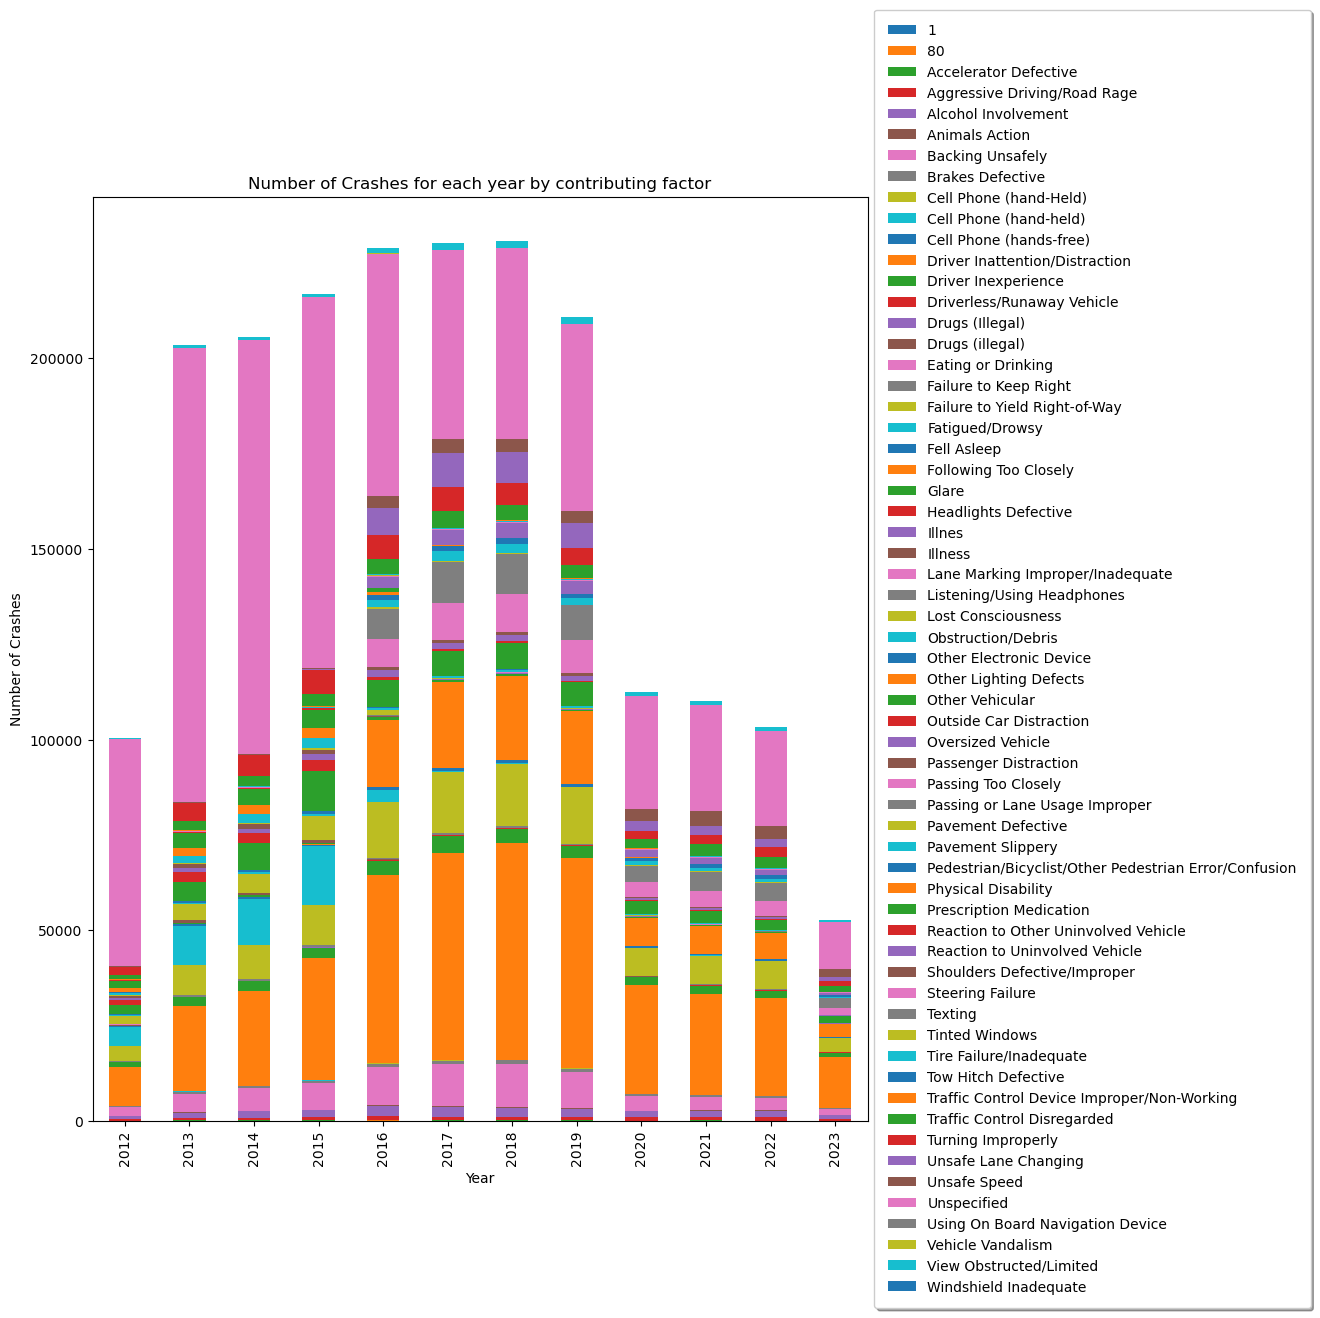

In [83]:
# plot Number of Crashes for each vehicle type
df.groupby(['year','CONTRIBUTING FACTOR VEHICLE 1'])['COLLISION_ID'].size().unstack().plot(kind='bar', figsize=(10,12), stacked=True).legend(loc='center left', bbox_to_anchor=(1, 0.5), fancybox=True, shadow=True, borderpad=1)
plt.title('Number of Crashes for each year by contributing factor')
plt.xlabel('Year')
plt.ylabel('Number of Crashes')

In [84]:
df.columns

Index(['CRASHDATE', 'CRASHTIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'Vehicle1', 'Vehicle2', 'Vehicle3', 'Vehicle4',
       'Vehicle5', 'DAYOFWEEK', 'MONTH', 'year'],
      dtype='object')

In [86]:
import seaborn as sns

In [87]:
# creating a new dataframe to store year, Primary Type, and number of crashes
crashdf = pd.DataFrame(df.groupby(['CRASHDATE','Vehicle1']).size().sort_values(ascending=False).rename('COUNT').reset_index())


In [88]:
# display the dataframe
crashdf.head()

,CRASHDATE,Vehicle1,COUNT
0,2014-01-21,PASSENGER VEHICLE,594
1,2015-01-18,PASSENGER VEHICLE,542
2,2014-02-03,PASSENGER VEHICLE,505
3,2018-11-15,Sedan,481
4,2017-05-19,Sedan,480


In [102]:
crash_count_by_date = pd.DataFrame(df.groupby('CRASHDATE').size().sort_values(ascending=False).rename('COUNT').reset_index())


In [103]:
crash_count_by_date.head()


,CRASHDATE,COUNT
0,2014-01-21,1161
1,2018-11-15,1065
2,2017-12-15,999
3,2017-05-19,974
4,2015-01-18,961


In [151]:
# import relevant libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")


[Text(0, 0, '2014-01-21T00:00:00.000000000'),
 Text(1, 0, '2018-11-15T00:00:00.000000000'),
 Text(2, 0, '2017-12-15T00:00:00.000000000'),
 Text(3, 0, '2017-05-19T00:00:00.000000000'),
 Text(4, 0, '2015-01-18T00:00:00.000000000'),
 Text(5, 0, '2014-02-03T00:00:00.000000000'),
 Text(6, 0, '2015-03-06T00:00:00.000000000'),
 Text(7, 0, '2017-05-18T00:00:00.000000000'),
 Text(8, 0, '2017-01-07T00:00:00.000000000'),
 Text(9, 0, '2018-03-02T00:00:00.000000000'),
 Text(10, 0, '2017-12-14T00:00:00.000000000'),
 Text(11, 0, '2016-09-30T00:00:00.000000000'),
 Text(12, 0, '2018-11-09T00:00:00.000000000'),
 Text(13, 0, '2013-11-26T00:00:00.000000000'),
 Text(14, 0, '2017-04-28T00:00:00.000000000'),
 Text(15, 0, '2013-03-08T00:00:00.000000000'),
 Text(16, 0, '2016-10-21T00:00:00.000000000'),
 Text(17, 0, '2018-06-29T00:00:00.000000000'),
 Text(18, 0, '2017-06-22T00:00:00.000000000'),
 Text(19, 0, '2018-12-14T00:00:00.000000000'),
 Text(20, 0, '2017-03-16T00:00:00.000000000'),
 Text(21, 0, '2018-06-1

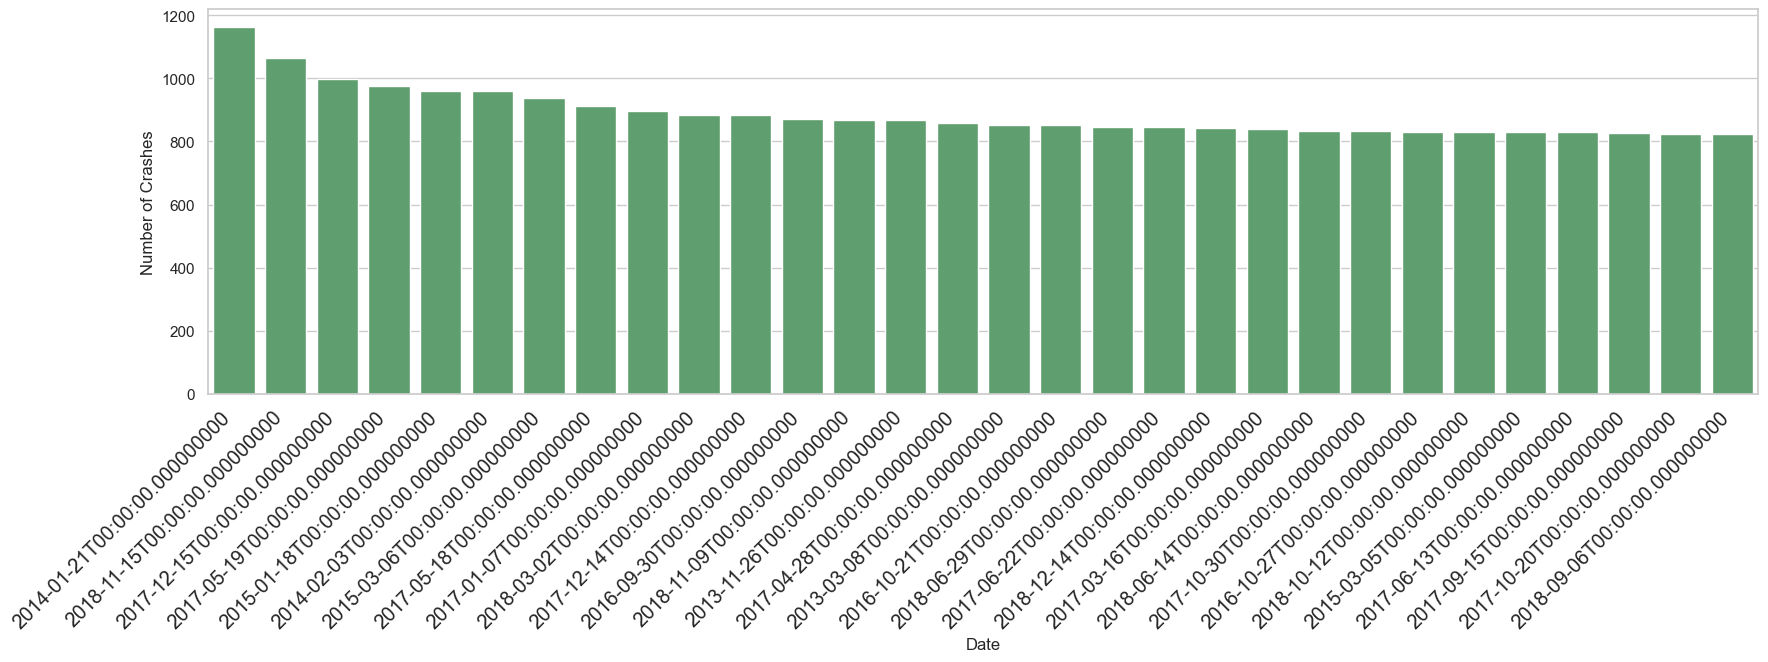

In [154]:
# create the matplotlib figure
fig, ax = plt.subplots(figsize=(20, 5))

# plot the graph of number of crashes vs. date
# First 30 maximum number of crashes will be plotted
barplot1 = sns.barplot(x="CRASHDATE", y="COUNT", data=crash_count_by_date.iloc[:30, :], color="g")
# set the axis labels
ax.set(ylabel="Number of Crashes", xlabel="Date")
# rotate xticklabels
barplot1.set_xticklabels(barplot1.get_xticklabels(),
                        rotation=45,
                        horizontalalignment='right',
                        fontweight='light',
                        fontsize='large'
                        )